In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt

In [ ]:
ticker = "MSFT"

start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2024, 12, 31)

data = yf.download(tickers = ticker, start = start_date, end = end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.DataFrame(data)
file_path = 'microsoft_data.csv'
df.to_csv(file_path, index = True)

In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,153.630676,153.735890,151.440331,151.870747,22622100
2020-01-03,151.717712,152.989840,151.182083,151.430778,21116200
2020-01-06,152.109863,152.176824,149.699516,150.244720,20813700
2020-01-07,150.722992,152.722043,150.474311,152.387282,21634100
2020-01-08,153.123749,153.802860,151.076871,152.014222,27746500
...,...,...,...,...,...
2024-12-23,435.250000,437.649994,432.829987,436.739990,19152500
2024-12-24,439.329987,439.600006,434.190002,434.649994,7164500


In [ ]:
df = pd.DataFrame(data)
file_path = 'microsoft_data.csv'
df.to_csv(file_path, index = True)

In [ ]:
PrCl = pd.DataFrame(data['Close'])
#PrCl = PrCl.sort_values('Date')
PrCl = PrCl.rename(columns = {PrCl.columns[0]: 'Close'})
PrCl

Ticker,Close
Date,
2020-01-02,153.630676
2020-01-03,151.717712
2020-01-06,152.109863
2020-01-07,150.722992
2020-01-08,153.123749
...,...
2024-12-23,435.250000
2024-12-24,439.329987
2024-12-26,438.109985


In [ ]:
dates = ['2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03', '2024-01-02', '2024-12-30']
sp = pd.DataFrame(PrCl.loc[dates, 'Close'])
sp

,Close
Date,
2020-01-02,153.630676
2021-01-04,210.423080
2022-01-03,326.287781
2023-01-03,235.711716
2024-01-02,368.117249
2024-12-30,424.829987


In [ ]:
sp["Yearly Return"] = (sp.iloc[:, 0] - sp.iloc[:, 0].shift(1)) / sp.iloc[:, 0].shift(1)
sp

,Close,Yearly Return
Date,,
2020-01-02,153.630676,NaN
2021-01-04,210.423080,0.369668
2022-01-03,326.287781,0.550627
2023-01-03,235.711716,-0.277596
2024-01-02,368.117249,0.561727
2024-12-30,424.829987,0.154062


In [ ]:
MeanAnRet = sp['Yearly Return'].mean()
StdDevRet = sp['Yearly Return'].std()
print("Mean Annual Return: ", MeanAnRet, "\nStandard Deviation: ", StdDevRet)

Mean Annual Return:  0.2716976532026523 
Standard Deviation:  0.34895492615245066


In [ ]:
# Parametry symulacji
initial_price = 424.829987 # Początkowa cena akcji
mu = MeanAnRet  # Oczekiwany roczny zwrot (7%)
sigma = StdDevRet  # Odchylenie standardowe zwrotów (15%)
days = 365  # Liczba dni giełdowych w roku
simulations = 1000  # Liczba symulacji

In [ ]:
simulated_prices = np.zeros((days, simulations))
simulated_prices[0, :] = initial_price

for t in range(1, days):
    random_shock = np.random.normal(mu / days, sigma / np.sqrt(days), simulations)
    simulated_prices[t, :] = simulated_prices[t - 1, :] * (1 + random_shock)

In [ ]:
simulated_prices = pd.DataFrame(simulated_prices.T)
simulated_prices

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,424.829987,424.829987,424.829987,424.829987,424.829987,424.829987,424.829987,424.829987,424.829987,424.829987,...,424.829987,424.829987,424.829987,424.829987,424.829987,424.829987,424.829987,424.829987,424.829987,424.829987
1,437.621070,435.491211,426.128736,425.314314,430.205287,421.359131,430.612975,414.653426,434.776187,409.574232,...,420.254123,427.345922,427.973890,423.262643,429.133374,421.360362,427.151043,428.648187,433.289864,423.953386
2,437.224118,436.425969,416.583677,426.589970,431.408512,416.619911,434.509037,415.850510,439.478785,405.649480,...,401.525167,427.984245,433.938409,429.225302,415.288172,420.366861,435.914389,419.121183,437.461995,432.291296
3,443.594127,450.787126,420.500228,426.231024,436.133808,425.273216,428.628177,407.211890,424.685535,405.044201,...,398.390043,433.435463,427.607362,449.999969,392.814606,420.124986,428.518519,432.728199,448.436384,438.815161
4,451.547568,453.613500,418.298884,432.352246,434.662229,427.224270,433.256210,417.833791,428.002863,417.586466,...,397.172911,426.250879,435.903392,435.280715,393.493732,419.880792,405.900186,432.533186,454.991426,439.488592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,394.090061,1037.858003,538.797205,744.300880,356.390924,384.990598,599.662087,780.561032,986.335476,456.840211,...,568.609850,343.337847,891.212273,362.312206,406.532142,531.700567,478.677685,406.432693,524.195293,707.936110
361,394.044133,1045.933211,531.472929,718.671489,349.471293,388.427960,598.611787,784.234650,1001.776304,457.164332,...,560.608565,353.576576,901.204487,368.469399,419.611107,527.752982,487.711239,405.983343,527.991601,703.792125
362,386.881413,1013.557417,540.764919,736.370325,350.052304,395.915296,605.901949,786.998735,965.987888,463.958924,...,570.087076,353.489152,895.211398,370.032285,422.411324,527.281911,470.807699,405.448354,533.361695,705.012774
363,377.572366,1026.914252,537.267233,728.974857,348.146441,406.496678,604.536101,769.080546,961.040664,453.753285,...,572.142462,357.683728,909.721944,366.202420,425.930536,516.042607,484.688474,386.160975,527.259370,703.359611


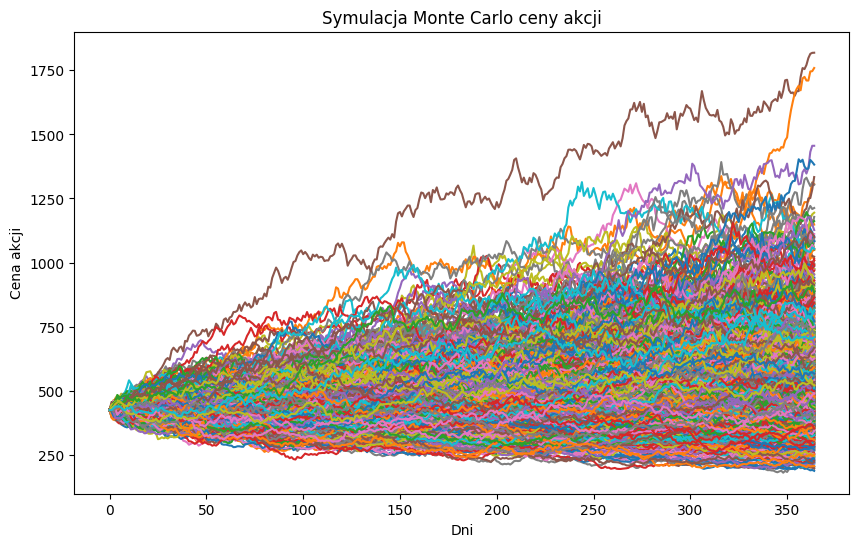

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(simulated_prices)
plt.title("Symulacja Monte Carlo ceny akcji")
plt.xlabel("Dni")
plt.ylabel("Cena akcji")
plt.show()

In [ ]:
EndInv = pd.DataFrame(simulated_prices.iloc[-1] * (10000/simulated_prices.iloc[0]))
EndInv

,0
0,8820.149988
1,23771.961182
2,12893.132604
3,17401.067990
4,8350.494652
...,...
995,12575.126126
996,11510.439716
997,9331.335365
998,12262.856171


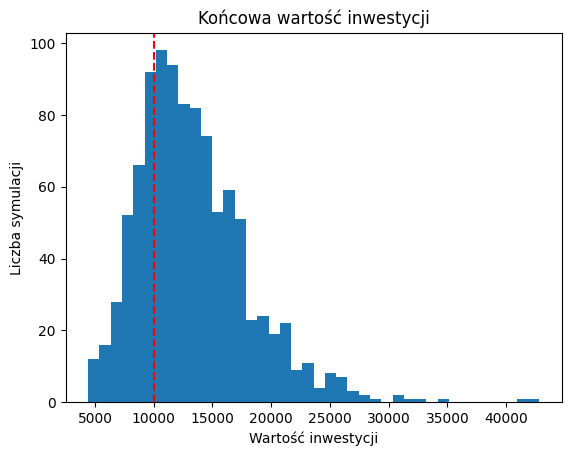

In [ ]:
plt.hist(EndInv, bins = 40)
plt.title("Końcowa wartość inwestycji")
plt.xlabel("Wartość inwestycji")
plt.ylabel("Liczba symulacji")
plt.axvline(10000, color = 'red', linestyle = '--')
plt.show()

In [ ]:
print("Średnia z symulowanych inwestycji: ", EndInv[0].mean())
print("W 10% najgorszych przypadków kończysz z mniej niż (10 percentyl): ", EndInv[0].quantile(0.1))
print("W 10% najlepszych przypadków kończysz z więcej niż (90 percentyl): ", EndInv[0].quantile(0.9))

Średnia z symulowanych inwestycji:  13323.366074425161
W 10% najgorszych przypadków kończysz z mniej niż (10 percentyl):  8001.990719247446
W 10% najlepszych przypadków kończysz z więcej niż (90 percentyl):  19498.394517998637
